# Выпускной проект SQL

# Описание проекта

Проект по анализу базы данных, крупного сервиса для чтения книг по подписке, который купила компания. В проекте произведён анализ  базы данных, которая содержит информацию о книгах, издательствах, авторах, а также пользовательские обзоры книг. В проекте даны ответы на 5 вопросов, с помощью запросов SQL,  сделан общий вывод с ценностными предложениями для нового продукта.  

# Цель исследования

Проанализировать базу данных крупного сервиса для чтения книг по подписке, для формирования ценностного предложения для нового продукта.

# Задача

Ответить на следующие вопросы, с помощью запросов SQL, к базе данных.

- Посчитать, сколько книг вышло после 1 января 2000 года.
- Для каждой книги посчитать количество обзоров и среднюю оценку.
- Определить издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры.
- Определить автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками.
- Посчитайть среднее количество обзоров от пользователей, которые поставили больше 48 оценок.

# Описание данных

**Таблица `books`**

Содержит данные о книгах:

- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.

**Таблица `authors`**

Содержит данные об авторах:

- `author_id` — идентификатор автора;
- `author` — имя автора.

**Таблица `publishers`**

Содержит данные об издательствах:

- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства;

**Таблица `ratings`**

Содержит данные о пользовательских оценках книг:

- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

**Таблица `reviews`**

Содержит данные о пользовательских обзорах на книги:

- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, написавшего обзор;
- `text` — текст обзора.

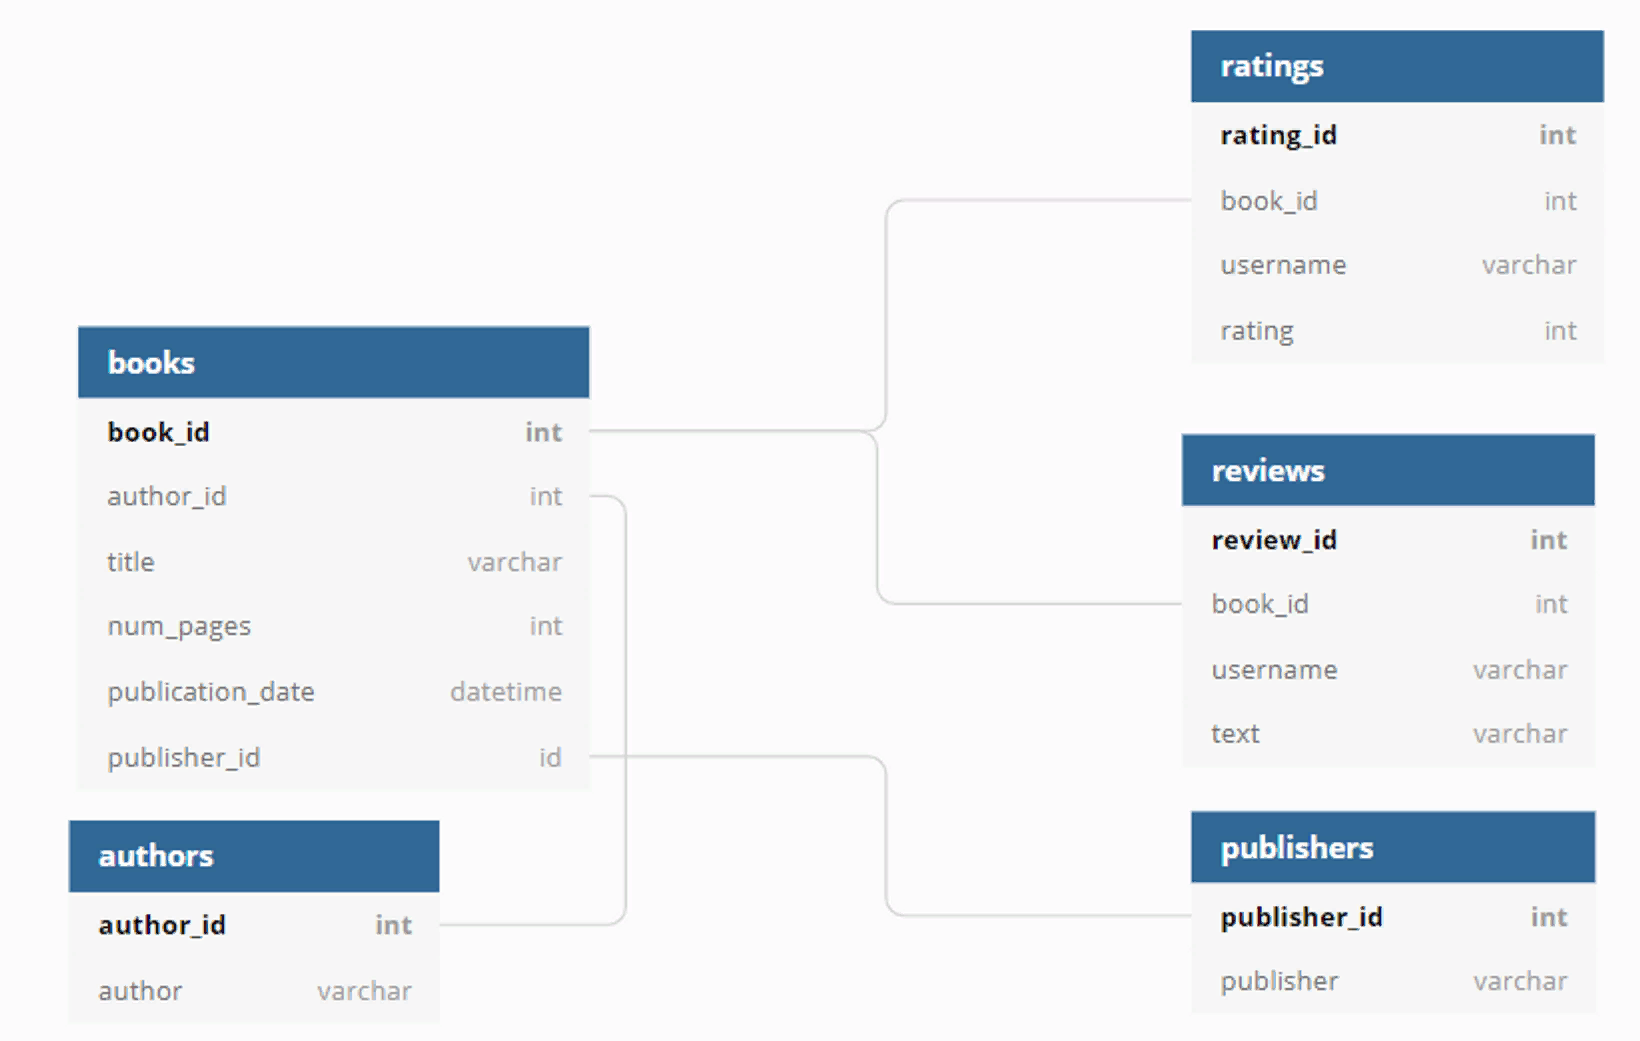

# План работы

1  Загрузка данных и анализ сводной информации

2  Решение вопросов поставленных в задаче проекта

2.1 Запрос, количества книг, которые вышли после 1 января 2000 года

2.2 Запрос количества обзоров и средней оценки для каждой книги

2.3 Запрос определения издательства, которое выпустило наибольшее число книг толще 50 страниц

2.4 Запрос определения автора с самой высокой средней оценкой книг, с учётом только книг с 50 и более оценками

2.5 Запрос определения среднее количество обзоров от пользователей, которые поставили больше 48 оценок

2.6 Дополнительное задание

3  Общий вывод

## Загрузка данных и анализ сводной информации

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import text, create_engine

# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
#engine = create_engine(connection_string, connect_args={'sslmode':'require'})
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

for table in ['books', 'authors', 'publishers', 'ratings', 'reviews']:
    query = '''SELECT * FROM books LIMIT 5'''
    
    
    con=engine.connect()

    tsycl = pd.io.sql.read_sql(sql=text(query), con = con) 
    
    
    display(tsycl.head())
    display(tsycl.info())
    print(f'Название датафрейма {table}, количество дубликатов {tsycl.duplicated().sum()}')
    print(f'Название датафрейма {table}, количество пропусков {tsycl.isna().sum()}')
    print('- ' * 50)  

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           5 non-null      int64 
 1   author_id         5 non-null      int64 
 2   title             5 non-null      object
 3   num_pages         5 non-null      int64 
 4   publication_date  5 non-null      object
 5   publisher_id      5 non-null      int64 
dtypes: int64(4), object(2)
memory usage: 368.0+ bytes


None

Название датафрейма books, количество дубликатов 0
Название датафрейма books, количество пропусков book_id             0
author_id           0
title               0
num_pages           0
publication_date    0
publisher_id        0
dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           5 non-null      int64 
 1   author_id         5 non-null      int64 
 2   title             5 non-null      object
 3   num_pages         5 non-null      int64 
 4   publication_date  5 non-null      object
 5   publisher_id      5 non-null      int64 
dtypes: int64(4), object(2)
memory usage: 368.0+ bytes


None

Название датафрейма authors, количество дубликатов 0
Название датафрейма authors, количество пропусков book_id             0
author_id           0
title               0
num_pages           0
publication_date    0
publisher_id        0
dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           5 non-null      int64 
 1   author_id         5 non-null      int64 
 2   title             5 non-null      object
 3   num_pages         5 non-null      int64 
 4   publication_date  5 non-null      object
 5   publisher_id      5 non-null      int64 
dtypes: int64(4), object(2)
memory usage: 368.0+ bytes


None

Название датафрейма publishers, количество дубликатов 0
Название датафрейма publishers, количество пропусков book_id             0
author_id           0
title               0
num_pages           0
publication_date    0
publisher_id        0
dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           5 non-null      int64 
 1   author_id         5 non-null      int64 
 2   title             5 non-null      object
 3   num_pages         5 non-null      int64 
 4   publication_date  5 non-null      object
 5   publisher_id      5 non-null      int64 
dtypes: int64(4), object(2)
memory usage: 368.0+ bytes


None

Название датафрейма ratings, количество дубликатов 0
Название датафрейма ratings, количество пропусков book_id             0
author_id           0
title               0
num_pages           0
publication_date    0
publisher_id        0
dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           5 non-null      int64 
 1   author_id         5 non-null      int64 
 2   title             5 non-null      object
 3   num_pages         5 non-null      int64 
 4   publication_date  5 non-null      object
 5   publisher_id      5 non-null      int64 
dtypes: int64(4), object(2)
memory usage: 368.0+ bytes


None

Название датафрейма reviews, количество дубликатов 0
Название датафрейма reviews, количество пропусков book_id             0
author_id           0
title               0
num_pages           0
publication_date    0
publisher_id        0
dtype: int64
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 


Вывод

Данные содержатся в 5 таблицах:

- books 1000 строк и 6 колонок
- authors 636 строк и 2 колонки
- publishers 340 строк и 2 колонки
- ratings 6456 строк и 4 колонки
- reviews 2793 строки и 4 колонки
- явных дубликатов нет
- пропусков нет

Во всех таблицах с publication_date обнаружено не соответствие типа данных. 

## Решение вопросов поставленных в задаче проекта

In [2]:
# Создадаём функцию для запросов к данным
def select(sql):
    return pd.read_sql(sql, con=engine)

2.1 Запрос, количество книг, которые вышли после 1 января 2000 года

In [3]:
query = (
'''
SELECT COUNT(*)
FROM books
WHERE publication_date > '2000-01-01';

''')

select(query)

,count
0,819


После 1 января 2000 года вышло 819 книг

2.2 Запрос количества обзоров и средней оценки для каждой книги

In [4]:
query = """

SELECT title,
       COUNT(DISTINCT review_id) as review_cnt,
       ROUND(AVG(rating), 2) as rating_avg
FROM books AS b 
     LEFT JOIN ratings as r 
     ON b.book_id = r.book_id
     LEFT JOIN reviews as rv 
     ON b.book_id = rv.book_id
GROUP BY b.book_id
ORDER BY review_cnt DESC
"""
select(query)   

,title,review_cnt,rating_avg
0,Twilight (Twilight #1),7,3.66
1,Water for Elephants,6,3.98
2,The Glass Castle,6,4.21
3,Harry Potter and the Prisoner of Azkaban (Harr...,6,4.41
4,The Curious Incident of the Dog in the Night-Time,6,4.08
...,...,...,...
995,Anne Rice's The Vampire Lestat: A Graphic Novel,0,3.67
996,The Natural Way to Draw,0,3.00
997,The Cat in the Hat and Other Dr. Seuss Favorites,0,5.00
998,Essential Tales and Poems,0,4.00


Максимальное количество обзоров 7. Средний рейтинг каждой книги представлен в результате запроса выше. По рейтингу книг с максимальным обзором видно, что рейтинг не зависит от количества обзоров.

2.3 Запрос определения издательства, которое выпустило наибольшее число книг толще 50 страниц  

In [5]:
query = '''
SELECT 
    publishers.publisher_id, 
    publishers.publisher, 
    COUNT(books.book_id) as cnt_books
FROM 
    publishers
    JOIN books ON publishers.publisher_id = books.publisher_id
WHERE 
    books.num_pages > 50
GROUP BY publishers.publisher_id
ORDER BY cnt_books DESC
LIMIT 3 ;
        ''' 
select(query)

,publisher_id,publisher,cnt_books
0,212,Penguin Books,42
1,309,Vintage,31
2,116,Grand Central Publishing,25


Больше всего книг, толще 50 страниц выпустило издательство Penguin Books

2.4 Запрос определения автора с самой высокой средней оценкой книг, с учётом только книг с 50 и более оценками

In [6]:
query = '''

SELECT
  author,
  AVG(sub.avg_rating) as high_avg_rating
FROM
(SELECT
  author,
  books.book_id,
  AVG(rating) as avg_rating
FROM 
  authors
LEFT JOIN books ON books.author_id = authors.author_id
LEFT JOIN ratings ON ratings.book_id = books.book_id
GROUP BY
  author,
  books.book_id
HAVING
  COUNT(rating) > 50) as sub
GROUP BY
  author
ORDER BY
  high_avg_rating DESC
LIMIT 3
'''
select(query)

,author,high_avg_rating
0,J.K. Rowling/Mary GrandPré,4.283844
1,Markus Zusak/Cao Xuân Việt Khương,4.264151
2,J.R.R. Tolkien,4.258446


J.K. Rowling/Mary GrandPré являются автором с самой высокой средней оценкой книг, с учётом только книг с 50 и более оценками. 

2.5 Запрос определения среднее количество обзоров от пользователей, которые поставили больше 48 оценок

In [7]:
query = '''

SELECT
  AVG(review_cnt) as avg_review_cnt
FROM
(SELECT
  COUNT(review_id) as review_cnt
FROM
  reviews
WHERE username IN
(SELECT
  username
FROM
  ratings
GROUP BY
  username
HAVING
  COUNT(ratings) > 48)
GROUP BY
  username) as sub_review_cnt 

'''
select(query)

,avg_review_cnt
0,24.0


Среднее количство обзоров от пользователей, которые поставили больше 48 оценок соствляет 24.

2.6 Дополнительное задание

In [8]:
query = '''

SELECT 
  EXTRACT(YEAR FROM publication_date)::int as year,
  COUNT(DISTINCT publisher_id) as pub_count,
  COUNT(book_id) as book_count,
  SUM(num_pages) as page_sum
FROM 
  books
GROUP BY
  year
HAVING
  COUNT(book_id) > 30
ORDER BY year
;
 ''' 
select(query)

,year,pub_count,book_count,page_sum
0,1999,26,41,15763
1,2000,35,38,13328
2,2001,41,60,21758
3,2002,62,94,38597
4,2003,65,105,41423
5,2004,88,124,46779
6,2005,89,139,55967
7,2006,109,184,68302
8,2007,38,50,18258


## Общий вывод

В данном исследовании были проанализированы датасеты, с информацией о книгах, их авторах, издателях, а также с оценками книг. 

Было выявлено:
 - что из 1000 книг в датасете после 1 января 2000 года вышло 819 книг;
 - Максимальное количество обзоров 7. По рейтингу книг с максимальным количеством обзоров видно, что рейтинг не зависит от количества обзоров.
 - Penguin Books является издательством, выпустившим наибольшее количество книг (не считая брошюр), из 1000 книг в датасете 42 книги приходятся на издательство Penguin Books;
 - авторы J.K. Rowling/Mary GrandPré имеют самую высокую среднюю оценку книг, при рассмотрении книг датасета с числом оценок 50 и более. Средняя оценка книг авторов составила почти 4.28 из 5;
 - были выбраны пользователи, которые поставили более 48 оценок книгам, среди них было рассчитано среднее число обзоров, которые они делают, получилось 24 обзора на такого пользователя, их можно отнести к наиболее активным читателям в разрезе данного датасета.

**Предложения для нового продукта.**

На основании проведенного анализа можно делать специальные подборки книг для активных пользоватиелей, можно составить портрет читателя, посмотреть, какие авторы удостаиваются наибольших оценок, добавлять на платформу книги этих авторов.

Можно дополнить каталог книг, книгами издательств, книги которых, удостаиваются максимальными оценками и наибольшим количеством обзоров.

На популярных авторов, таких как J.K. Rowling/Mary GrandPré и успешное издательство Penguin Books, нужно обратить внимание в первую очередь, для пополнения каталога книг, крупного сервиса для чтения книг по подписке . 